In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

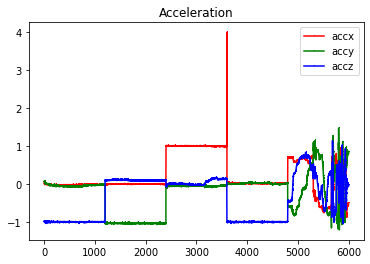

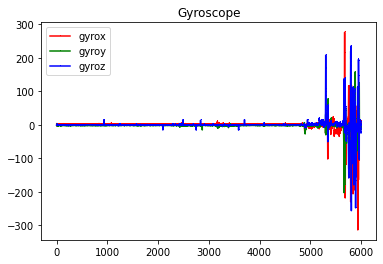

In [ ]:
filename1='/content/All_data2.csv'
data=pd.read_csv(filename1)
index=range(1,len(data['accx'])+1)

plt.plot(index, data['accx'], 'r.', label='accx', linestyle='solid', marker=',')
plt.plot(index, data['accy'], 'g.', label='accy', linestyle='solid', marker=',')
plt.plot(index, data['accz'], 'b.', label='accz', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.legend()
plt.show()

plt.plot(index, data['gyrox'], 'r.', label='gyrox', linestyle='solid', marker=',')
plt.plot(index, data['gyroy'], 'g.', label='gyroy', linestyle='solid', marker=',')
plt.plot(index, data['gyroz'], 'b.', label='gyroz', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.legend()
plt.show()


In [ ]:
x_values=[]
y_values=[]
for i in range(1,data.shape[0]):
    tensor = []
    tensor = [
        #normalizing and append data to x_values. Ignore timestamp for now
        #(df['timestamp'][i]) / 1200,
        (data['accx'][i] +1 ) /2 , (data['accy'][i] +1 ) /2, (data['accz'][i] +1 ) /2, (data['gyrox'][i] + 5) / 10, (data['gyroy'][i] + 5) / 10, (data['gyroz'][i] + 5) / 10
    ]

    x_values.append(tensor)
    y_values.append(int(data['label'][i]))
print(x_values[0])
print(y_values[1])


[0.51, 0.545, 0.010000000000000009, 0.891, 0.46299999999999997, 0.567]
2


In [ ]:
#split data into train, validation, test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
print(x_train[0])
print(x_test[0])
print(x_validate[0])
print(y_train)
print(y_test)
print (y_validate)

print(len(y_values))
print(len(y_train))
print(len(y_validate))
print(len(y_test))
#len(y_test)+len(y_validate)+len(y_train)=len(y_values)

[0.51, 0.52, 0.010000000000000009, 0.75, 0.372, 0.476]
[1, 1, 2, 3, 3, 4, 1, 3, 3, 4, 2, 2, 5, 2, 2, 1, 5, 4, 4, 5, 3, 4, 5, 2, 3, 4, 3, 3, 3, 5, 4, 4, 4, 2, 1, 3, 5, 3, 2, 2, 5, 3, 3, 3, 4, 4, 3, 1, 2, 2, 2, 4, 4, 4, 4, 1, 2, 5, 1, 2, 5, 3, 3, 1, 4, 5, 4, 5, 1, 4, 5, 2, 1, 4, 3, 5, 4, 3, 5, 3, 3, 4, 3, 1, 2, 3, 5, 5, 1, 3, 5, 4, 2, 1, 2, 5, 1, 5, 5, 5, 3, 1, 2, 4, 2, 5, 4, 4, 3, 4, 2, 3, 5, 5, 4, 4, 5, 1, 3, 2, 3, 5, 5, 2, 2, 1, 3, 3, 1, 5, 4, 1, 4, 4, 2, 1, 3, 4, 5, 4, 3, 4, 3, 5, 3, 1, 1, 2, 2, 5, 5, 4, 3, 2, 4, 3, 2, 4, 5, 4, 5, 4, 1, 2, 1, 3, 1, 5, 5, 5, 4, 2, 1, 3, 5, 4, 5, 2, 2, 5, 3, 2, 1, 2, 5, 3, 3, 3, 1, 5, 3, 3, 5, 2, 5, 4, 4, 5, 2, 5, 3, 1, 2, 4, 5, 5, 1, 2, 4, 1, 4, 1, 5, 1, 1, 1, 2, 5, 1, 1, 5, 5, 1, 3, 3, 2, 3, 2, 3, 4, 4, 3, 3, 2, 1, 1, 5, 5, 3, 2, 5, 5, 3, 4, 5, 4, 1, 3, 3, 3, 4, 2, 3, 1, 2, 1, 3, 4, 1, 4, 4, 1, 4, 4, 2, 3, 4, 3, 1, 3, 1, 5, 1, 3, 4, 2, 5, 5, 3, 3, 5, 3, 2, 5, 4, 4, 2, 4, 5, 5, 3, 2, 4, 4, 4, 5, 2, 2, 3, 4, 1, 3, 3, 3, 5, 1, 5, 1, 4, 1, 3, 4, 5, 4, 3,

In [ ]:
#for the report we can each run a different ML technique/ activation fcn
#Other activation fcns: sigmoid, tanh
#can also change tye layers/epoch etc 
from tensorflow.keras import layers
model_1=tf.keras.Sequential()
model_1.add(layers.Dense(16,activation='relu',input_shape=(6,)))
model_1.add(layers.Dense(15, activation='relu'))
model_1.add(layers.Dense(6))
#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) -> predict integer value label
model_1.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 15)                255       
                                                                 
 dense_2 (Dense)             (None, 6)                 96        
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
225/225 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.0743 - val_accuracy: 0.9792
Epoch 2/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0615 - val_accuracy: 0.9858
Epoch 3/200
225/225 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0643 - val_accuracy: 0.9867
Epoch 4/200
225/225 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 0.0627 - val_accuracy: 0.9850
Epoch 5/200
225/225 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0683 - val_accuracy: 0.9850
Epoch 6/200
225/225 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.1026 - val_accuracy: 0.9650
Epoch 7/200
225/225 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.0590 - val_accuracy: 0.9867

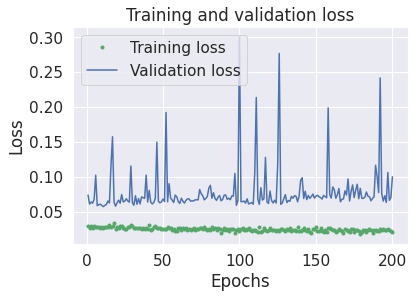

In [ ]:
history_1=model_1.fit(x_train,y_train,epochs=200,batch_size=16,validation_data=(x_validate,y_validate))
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']
epochs=range(1,len(loss)+1)
SKIP=0
plt.plot(epochs[SKIP:],loss[SKIP:],'g.',label='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model_1.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


38/38 - 0s - loss: 0.0294 - accuracy: 0.9908 - 80ms/epoch - 2ms/step

Test accuracy: 0.9908333420753479


In [ ]:
probability_model = tf.keras.Sequential([model_1, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

[7.2376397e-11 5.8742788e-02 9.4104785e-01 4.5829093e-08 4.7052581e-11
 2.0934560e-04]
2
2


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=[]
for predict in predictions:
  y_pred.append(np.argmax(predict))
#y_pred = np.argmax(predictions)
print(y_pred)
array=confusion_matrix(y_test, y_pred)
print(array)

[2, 4, 5, 2, 2, 2, 5, 1, 1, 3, 1, 2, 3, 1, 3, 5, 4, 5, 4, 4, 5, 4, 2, 3, 1, 1, 4, 2, 2, 3, 2, 1, 5, 2, 1, 5, 3, 3, 4, 1, 4, 5, 2, 2, 4, 1, 5, 2, 4, 2, 4, 3, 5, 1, 3, 2, 5, 5, 1, 5, 3, 4, 4, 5, 5, 5, 2, 4, 3, 3, 5, 1, 5, 3, 1, 1, 3, 4, 5, 1, 5, 3, 1, 5, 4, 5, 4, 3, 3, 1, 2, 3, 3, 2, 5, 3, 3, 5, 1, 2, 4, 1, 5, 4, 2, 4, 3, 5, 3, 4, 1, 1, 4, 2, 2, 3, 3, 5, 3, 2, 5, 2, 4, 1, 1, 3, 5, 1, 2, 4, 4, 5, 5, 5, 5, 4, 4, 1, 3, 5, 4, 4, 4, 4, 2, 2, 4, 3, 5, 4, 5, 2, 4, 4, 4, 1, 4, 2, 1, 3, 1, 5, 1, 2, 2, 3, 2, 1, 2, 2, 3, 1, 2, 5, 1, 1, 2, 3, 3, 2, 4, 5, 3, 5, 1, 4, 2, 3, 4, 2, 1, 1, 5, 1, 4, 5, 2, 5, 2, 3, 2, 4, 2, 1, 2, 1, 2, 2, 1, 1, 2, 3, 4, 4, 3, 3, 2, 4, 3, 5, 4, 4, 4, 4, 5, 3, 4, 1, 2, 5, 1, 1, 4, 5, 3, 4, 4, 1, 2, 4, 1, 5, 1, 4, 3, 3, 3, 2, 4, 3, 1, 3, 3, 4, 2, 2, 4, 2, 2, 4, 5, 5, 2, 2, 4, 2, 4, 1, 3, 4, 2, 4, 5, 2, 4, 3, 4, 3, 5, 3, 1, 4, 5, 3, 2, 4, 5, 1, 4, 5, 5, 5, 4, 5, 1, 3, 2, 3, 3, 3, 1, 3, 3, 1, 1, 4, 1, 3, 5, 2, 1, 4, 3, 5, 3, 2, 5, 5, 4, 5, 1, 5, 5, 4, 4, 4, 4, 5, 4, 1, 1, 3, 3, 

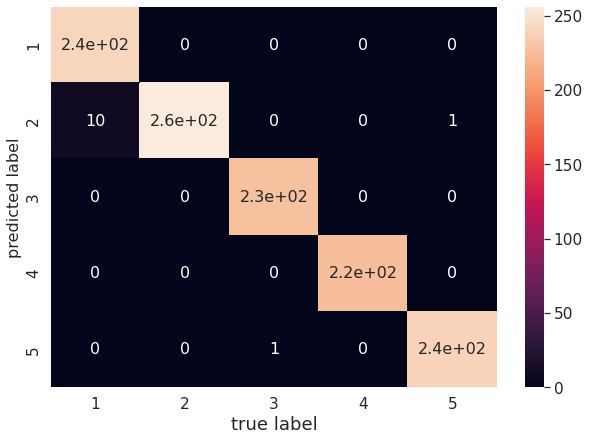



classification report:

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       241
           2       1.00      0.96      0.98       267
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       225
           5       1.00      1.00      1.00       240

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(array, range(1,6), range(1,6))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('true label', fontsize=18)
plt.ylabel('predicted label', fontsize=16)
plt.show()
print("\n\nclassification report:\n\n"+classification_report(y_test, y_pred))